In [1]:
import numpy as np
from pathlib import Path
import pandas as pd
from sys import platform
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import medfilt
sns.set_style('ticks')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
vol_file = Path('../Voltron_data/Voltron_Log_DRN_Exp.csv')
dat_xls_file = pd.read_csv(vol_file, index_col=0)
dat_xls_file['folder'] = dat_xls_file['folder'].apply(lambda x: f'{x:0>8}')
# using Path to handle switches filesystems
if platform == "linux" or platform == "linux2":
    dir_folder = Path('/nrs/ahrens/Ziqiang/Takashi_DRN_project/ProcessedData/')
elif platform == 'win32':
    dir_folder = Path('U:\\Takashi') # put folder for windows system

## Detecting session with valid swim

In [3]:
from swim_dat import *

03152018 Fish1-1: average swim difference significance: 0.61
save swim file


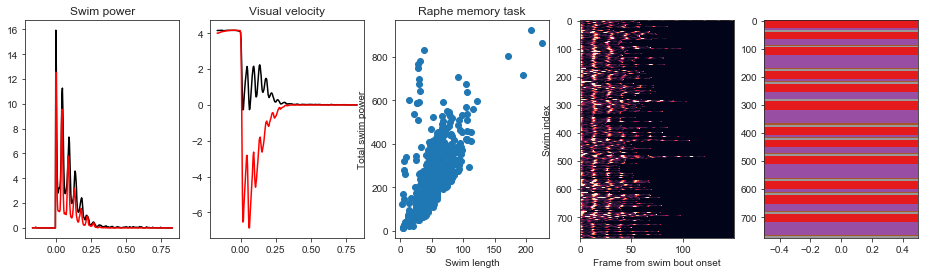

03152018 Fish4-1: average swim difference significance: 0.7
save swim file


<Figure size 432x288 with 0 Axes>

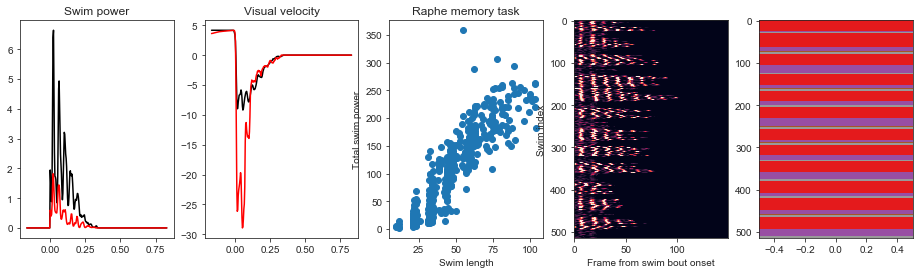

03152018 Fish4-2: average swim difference significance: 0.87
save swim file


<Figure size 432x288 with 0 Axes>

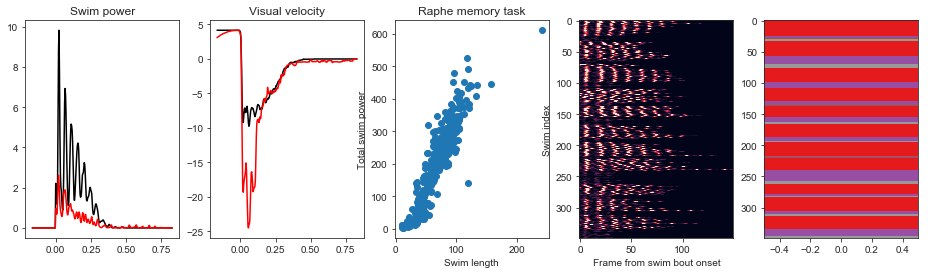

04052018 Fish4-1: average swim difference significance: 0.6
save swim file


<Figure size 432x288 with 0 Axes>

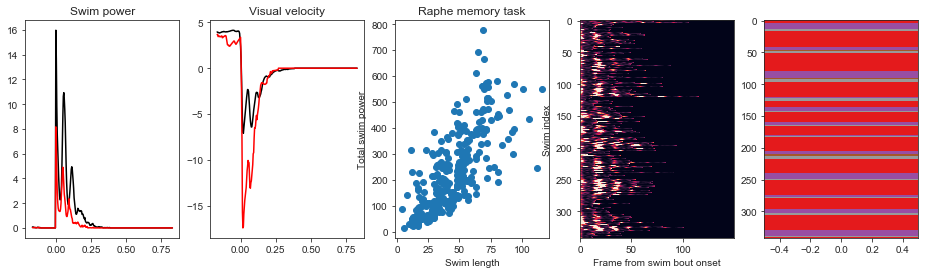

04052018 Fish4-2: average swim difference significance: 0.55
save swim file


<Figure size 432x288 with 0 Axes>

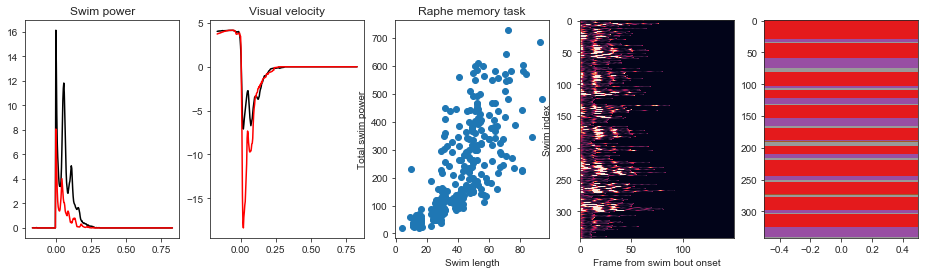

04122018 Fish2-1: average swim difference significance: 0.89
save swim file


<Figure size 432x288 with 0 Axes>

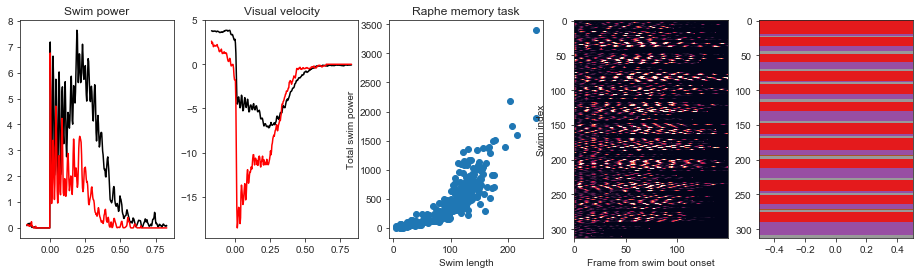

04122018 Fish2-2: average swim difference significance: 0.54
save swim file


<Figure size 432x288 with 0 Axes>

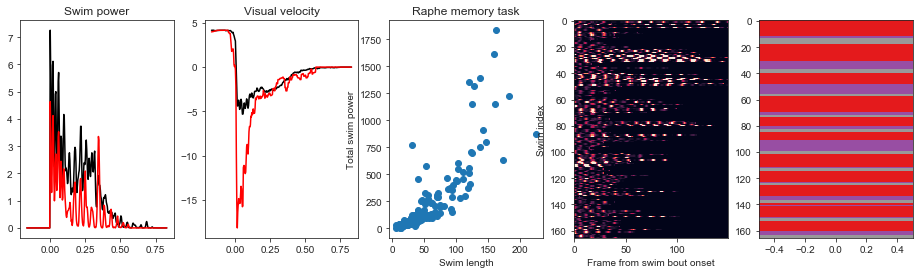

04122018 Fish4-1: average swim difference significance: 0.64
save swim file


<Figure size 432x288 with 0 Axes>

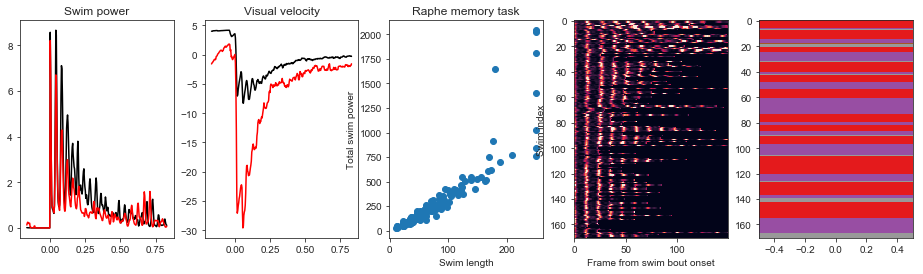

04192018 Fish1-1: average swim difference significance: 0.93
save swim file


<Figure size 432x288 with 0 Axes>

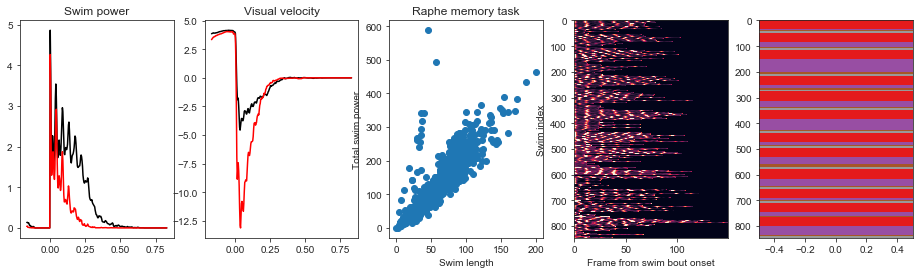

04192018 Fish1-2: average swim difference significance: 0.52
save swim file


<Figure size 432x288 with 0 Axes>

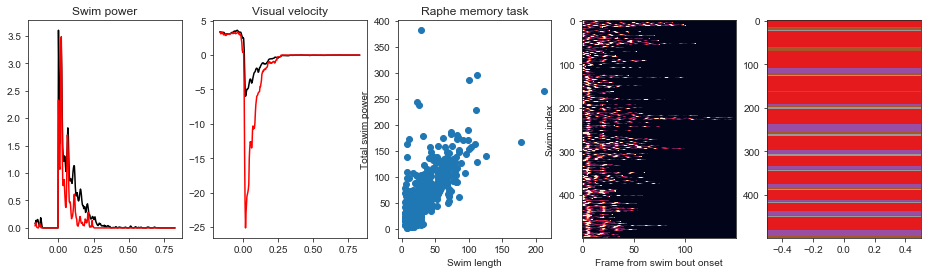

04192018 Fish2-2: average swim difference significance: 0.9
save swim file


<Figure size 432x288 with 0 Axes>

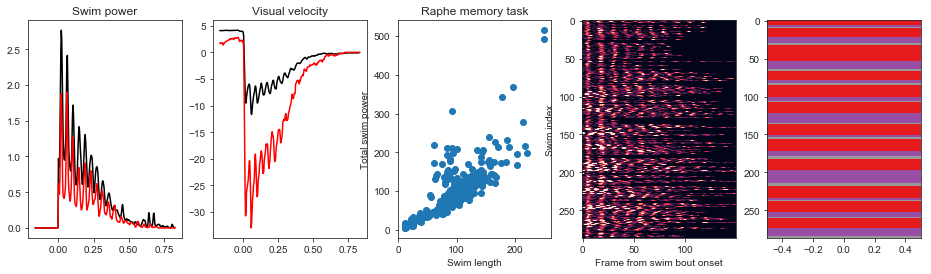

07122018 Fish1-1: average swim difference significance: 0.52
save swim file


<Figure size 432x288 with 0 Axes>

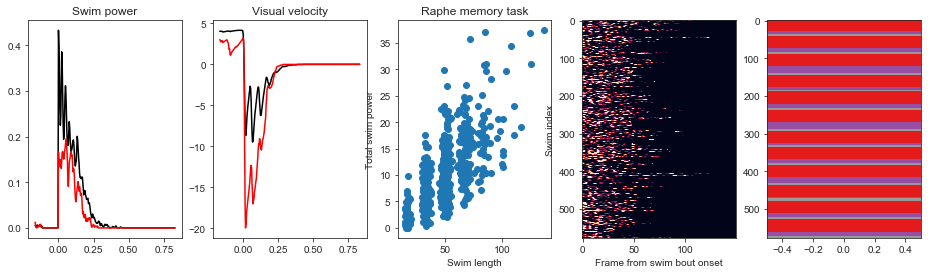

07122018 Fish2-2: average swim difference significance: 0.59
save swim file


<Figure size 432x288 with 0 Axes>

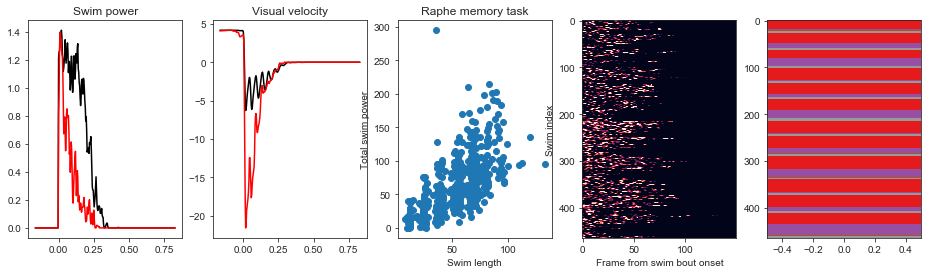

07262018 Fish2-1: average swim difference significance: 0.72
save swim file


<Figure size 432x288 with 0 Axes>

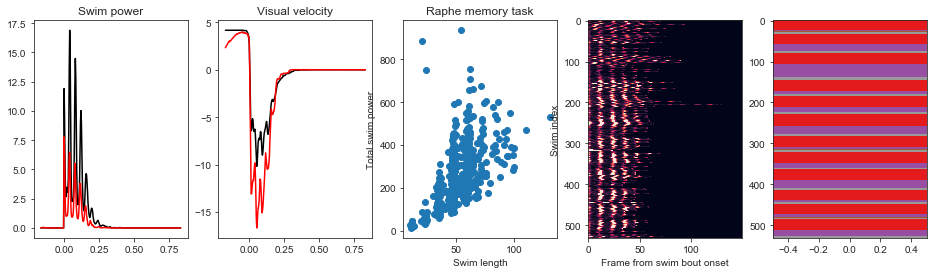

07262018 Fish2-2: average swim difference significance: 0.51
save swim file


<Figure size 432x288 with 0 Axes>

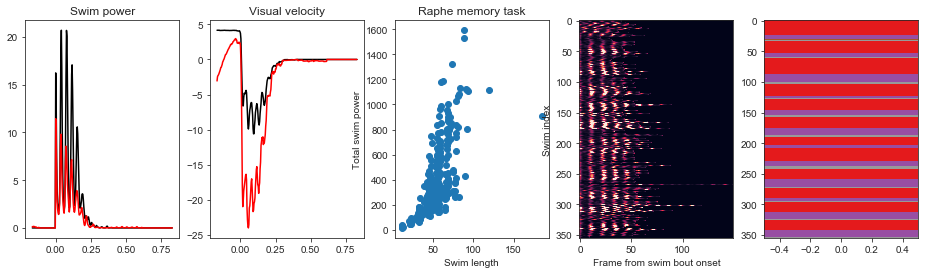

10182018 Fish2-1: average swim difference significance: 0.66
save swim file


<Figure size 432x288 with 0 Axes>

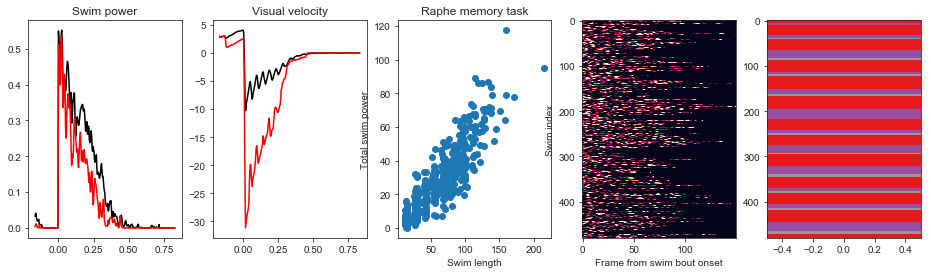

10182018 Fish3-1: average swim difference significance: 0.56
save swim file


<Figure size 432x288 with 0 Axes>

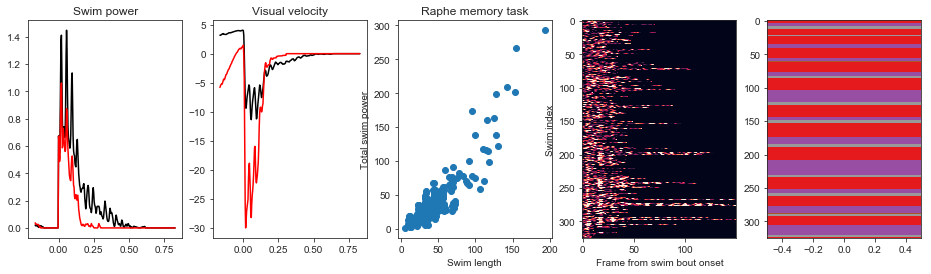

10182018 Fish3-2: average swim difference significance: 0.5
save swim file


<Figure size 432x288 with 0 Axes>

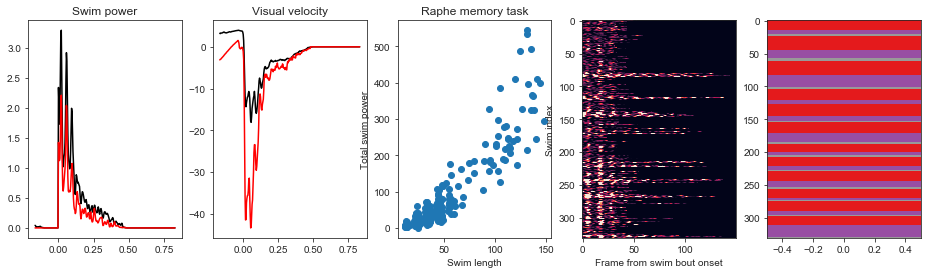

11222018 Fish1-1: average swim difference significance: 0.9
save swim file


<Figure size 432x288 with 0 Axes>

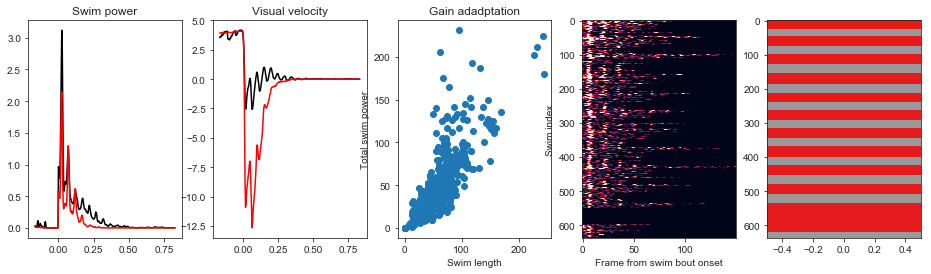

11222018 Fish1-2: average swim difference significance: 0.88
save swim file


<Figure size 432x288 with 0 Axes>

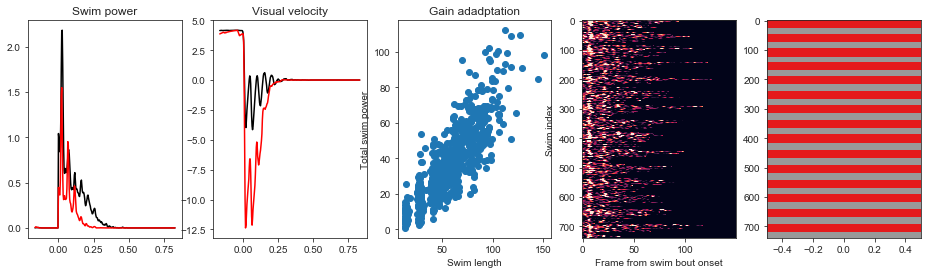

11222018 Fish1-3: average swim difference significance: 0.0
save swim file


<Figure size 432x288 with 0 Axes>

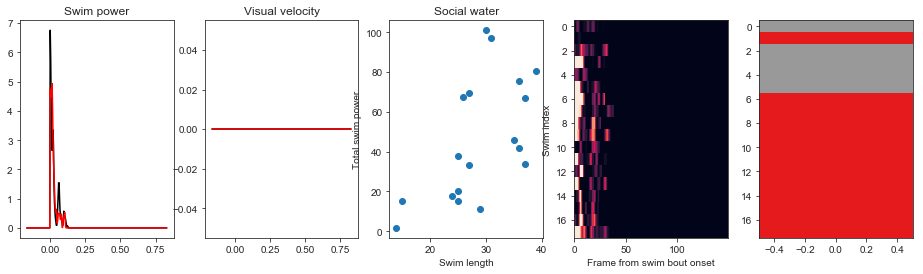

11222018 Fish2-1: average swim difference significance: 0.67
save swim file


<Figure size 432x288 with 0 Axes>

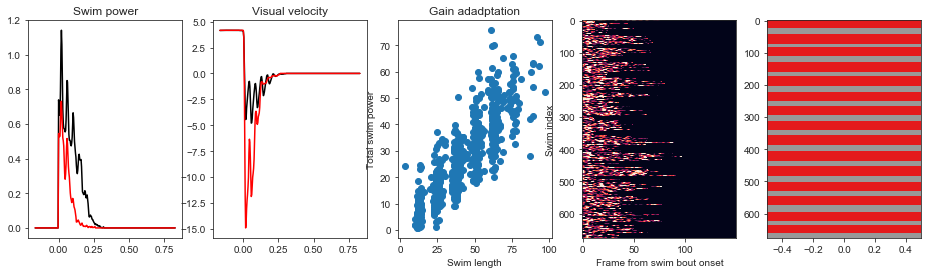

11222018 Fish2-2: average swim difference significance: 0.77
save swim file


<Figure size 432x288 with 0 Axes>

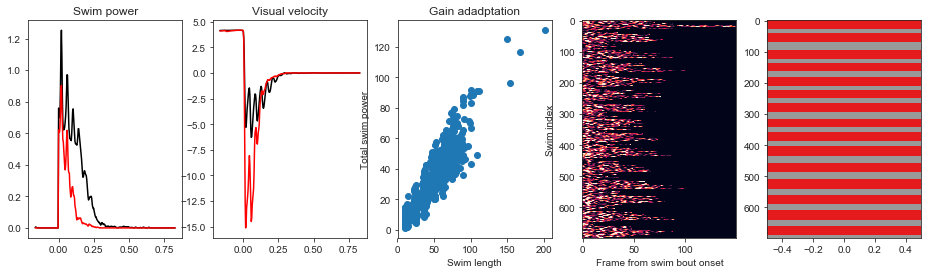

12202018 Fish3-1: average swim difference significance: 0.5
save swim file


<Figure size 432x288 with 0 Axes>

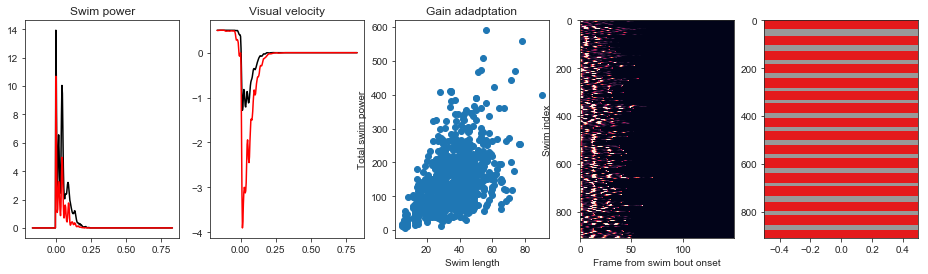

12202018 Fish3-2: average swim difference significance: 0.83
save swim file


<Figure size 432x288 with 0 Axes>

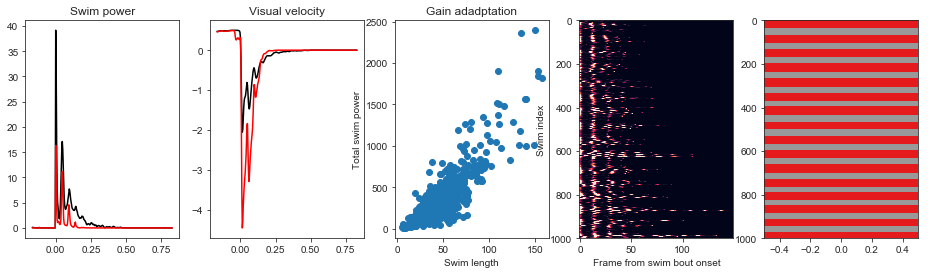

01032019 Fish2-2: average swim difference significance: 0.54
save swim file


<Figure size 432x288 with 0 Axes>

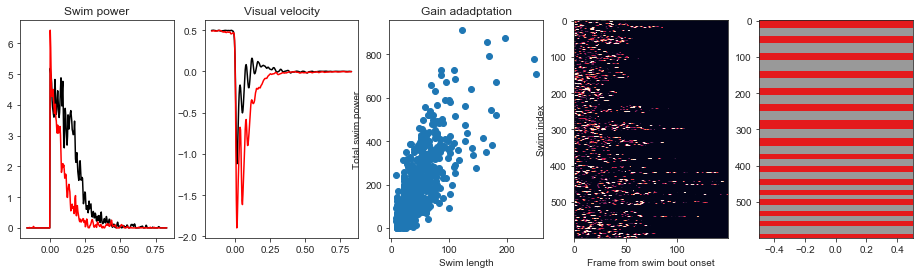

01172019 Fish2-1: average swim difference significance: 0.55
save swim file


<Figure size 432x288 with 0 Axes>

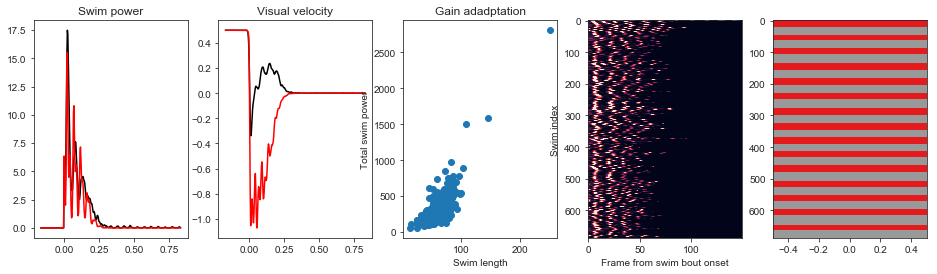

01242019 Fish2-1: average swim difference significance: 0.69
save swim file


<Figure size 432x288 with 0 Axes>

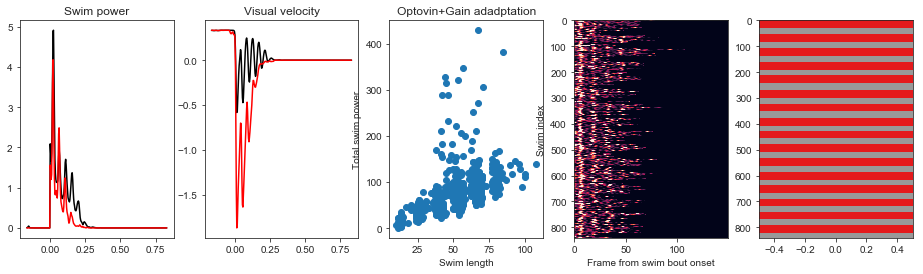

01242019 Fish2-2: average swim difference significance: 0.76
save swim file


<Figure size 432x288 with 0 Axes>

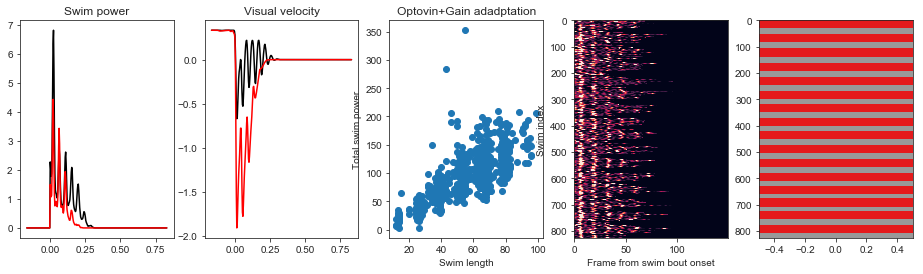

01242019 Fish3-2: average swim difference significance: 0.53
save swim file


<Figure size 432x288 with 0 Axes>

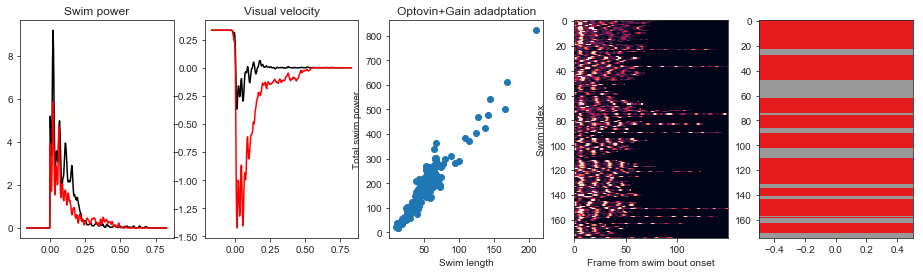

01312019 Fish3-1: average swim difference significance: 0.75
save swim file


<Figure size 432x288 with 0 Axes>

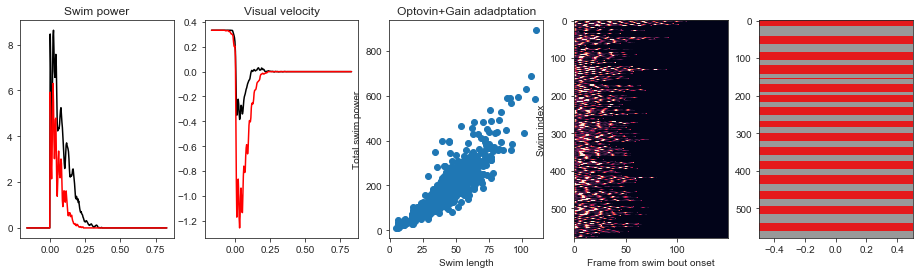

01312019 Fish3-2: average swim difference significance: 0.74
save swim file


<Figure size 432x288 with 0 Axes>

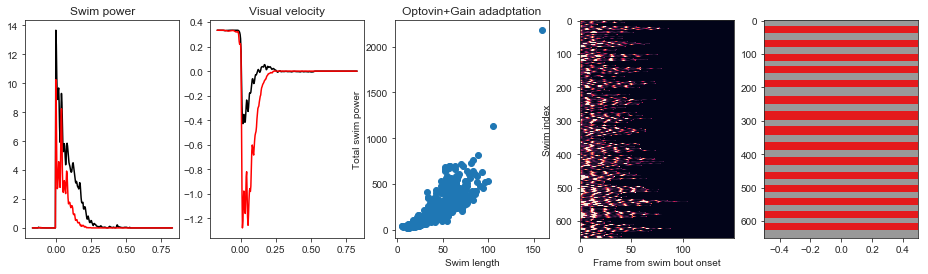

01312019 Fish3-3: average swim difference significance: 0.81
save swim file


<Figure size 432x288 with 0 Axes>

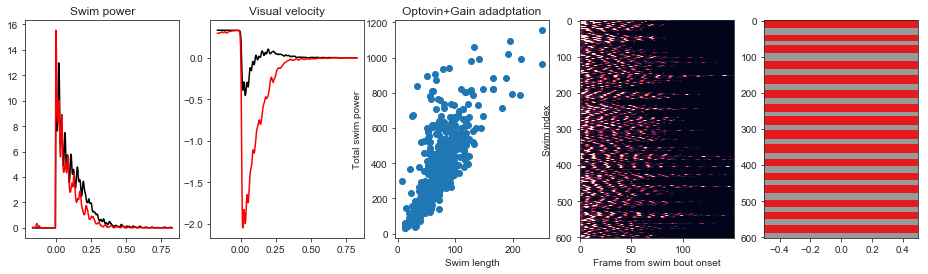

01312019 Fish4-2: average swim difference significance: 0.62
save swim file


<Figure size 432x288 with 0 Axes>

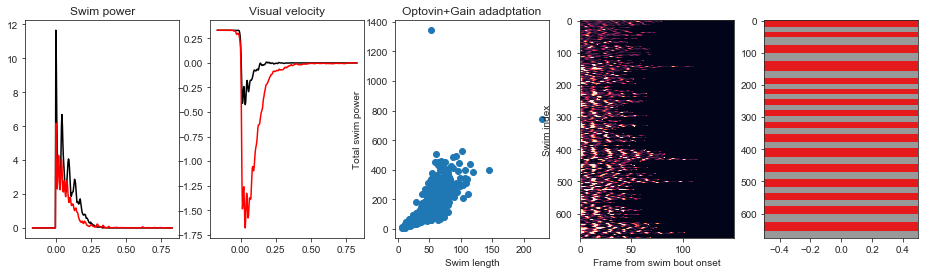

<Figure size 432x288 with 0 Axes>

In [4]:
# remove figures in the swim_power folder if any
import glob
if not os.path.isdir('swim_power'):
    os.mkdir('swim_power')
files = glob.glob('swim_power/*.png')
for f in files:
    os.remove(f)
plt.close('all')
valid_swim_list = []
for index, row in dat_xls_file.iterrows():
    valid_swim_list.append(valid_swim(row, sig_thres=0.5, isplot=True))

In [5]:
swim_xls_file = dat_xls_file[valid_swim_list]

In [6]:
swim_xls_file.to_csv('analysis_sections_based_on_swim_pattern.csv')
swim_xls_file = pd.read_csv('analysis_sections_based_on_swim_pattern.csv', index_col=0)
swim_xls_file['folder'] = swim_xls_file['folder'].apply(lambda x: f'{x:0>8}')